In [3]:
import pandas as pd

path = './datascienceforbusiness-master/insurance.csv'
insurance = pd.read_csv(path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print("Rows :", insurance.shape[0])
print('Columns :', insurance.shape[1])
print('\n Features : \n', insurance.columns)
print('\n Missing Values : \n', insurance.isnull().sum().values.sum())
print('\n Unique Value : \n', insurance.nunique())

Rows : 1338
Columns : 7

 Features : 
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

 Missing Values : 
 0

 Unique Value : 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [7]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


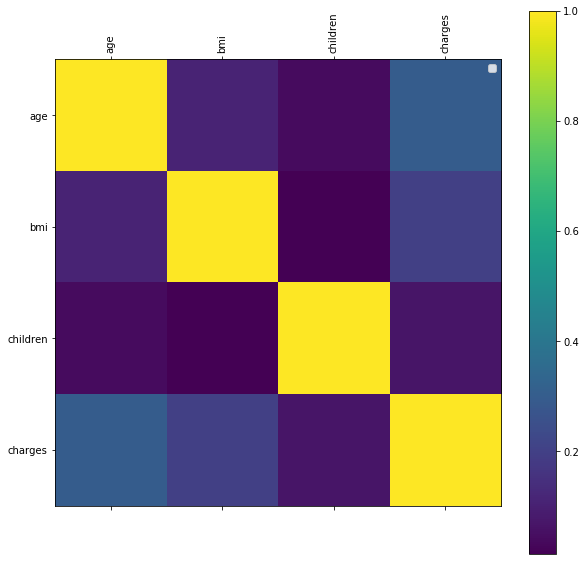

In [15]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):
    '''
        Function plots a graphical correlation matrix for each pair of columns in the dataframe
        
        Inputs:
            df: pandas Dataframe
            size: vertical and horizontal size of the plot '''
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')

    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(insurance)

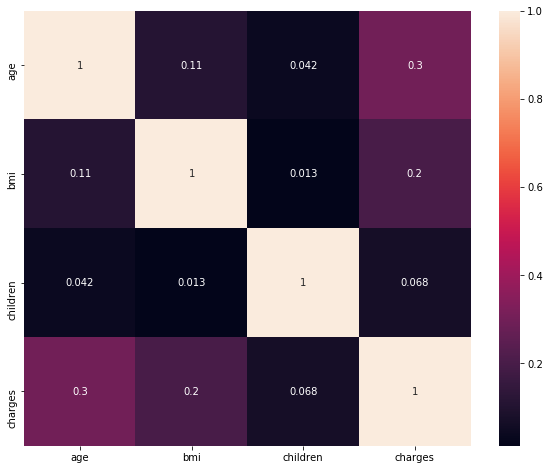

In [20]:
import seaborn as sns
fix, ax = plt.subplots(figsize=(10,8))
sns.heatmap(insurance.corr(), annot=True, ax=ax)

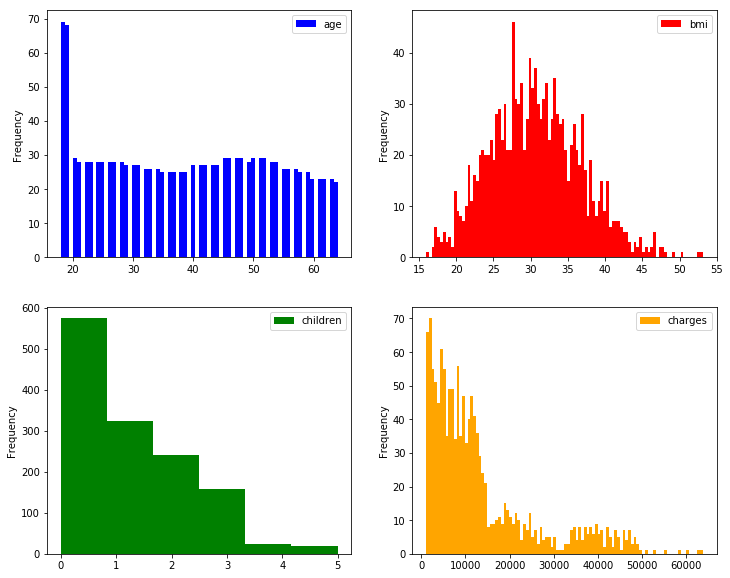

In [26]:
fig , axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
insurance.plot(kind='hist', y='age', bins=70, color='b', ax=axes[0][0])
insurance.plot(kind='hist', y='bmi', bins=100, color='r', ax=axes[0][1])
insurance.plot(kind='hist', y='children', bins=6, color='g', ax=axes[1][0])
insurance.plot(kind='hist', y='charges', bins=100, color='orange', ax=axes[1][1])

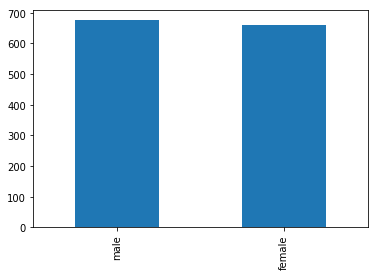

In [27]:
insurance['sex'].value_counts().plot(kind='bar')

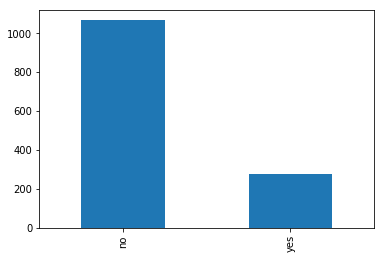

In [28]:
insurance.smoker.value_counts().plot(kind='bar')

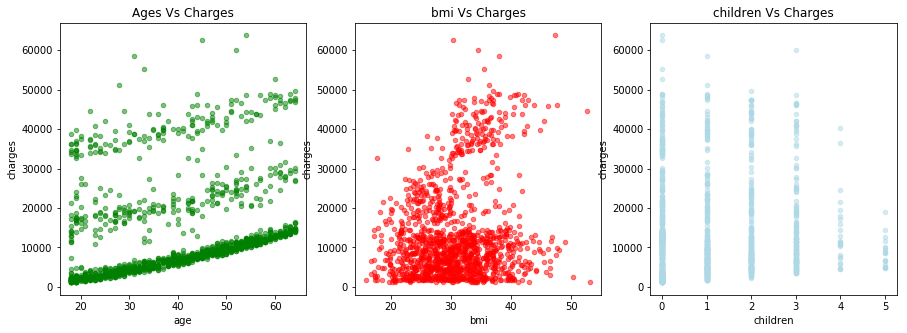

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title='Ages Vs Charges')
insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title='bmi Vs Charges')
insurance.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='lightblue', ax=axes[2], title='children Vs Charges')

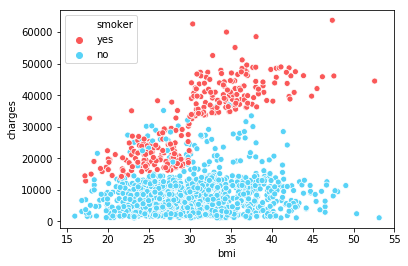

In [32]:
pal = ['#FA5858', '#58D3F7']
sns.scatterplot(x='bmi',y='charges',data=insurance, palette=pal, hue='smoker')